In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
import seaborn as sns

In [9]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [12]:
df.age.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [17]:
import matplotlib.pyplot as plt

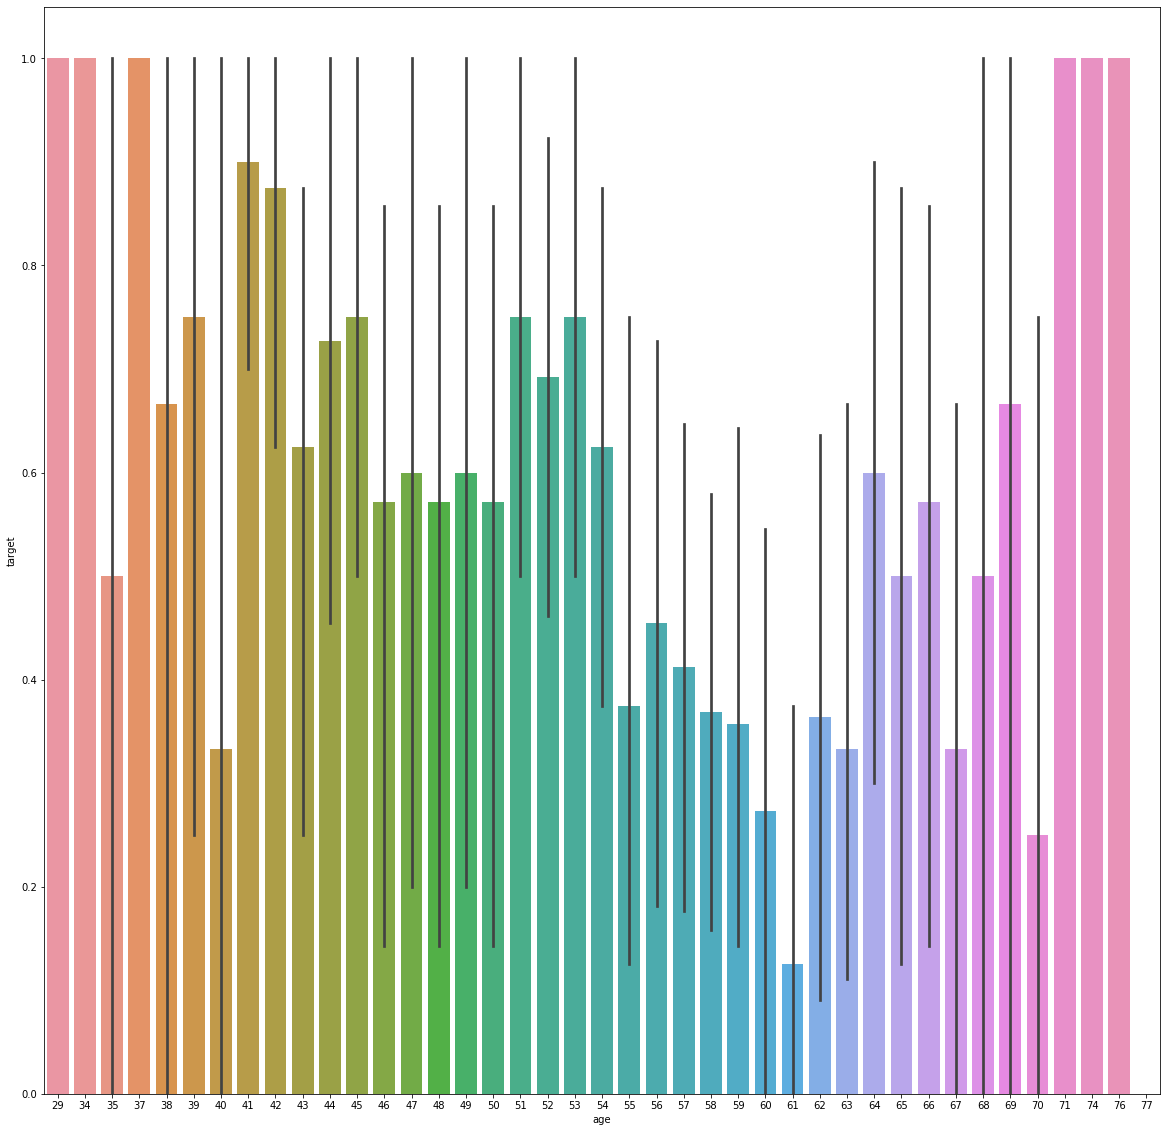

In [18]:
plt.figure(figsize=(20,20))
sns.barplot('age','target', data = df)


# i found that there is motre heart attack rate at age of the 29-34 and 71-76

In [57]:
df.shape

(303, 14)

In [59]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# it is almost there is no imbalance problem


In [56]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# There is no null

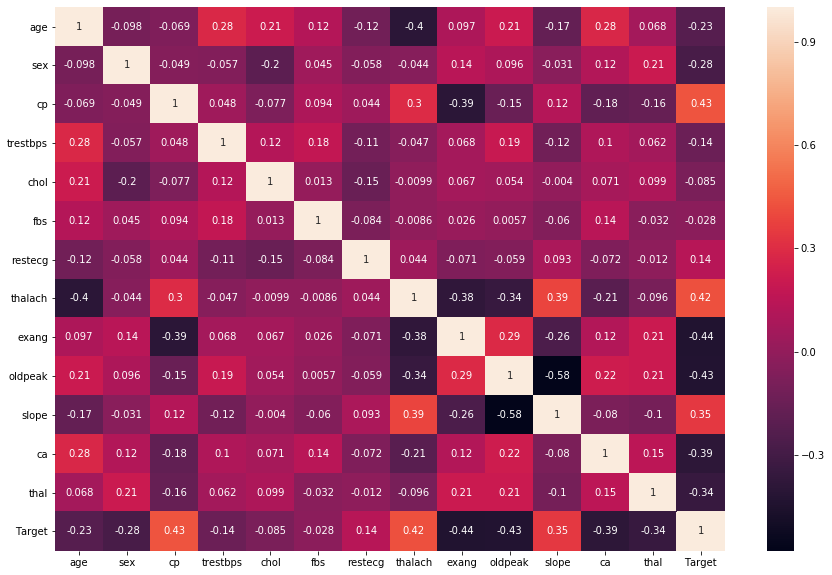

In [128]:
# taking the orginal dataframe
from sklearn.preprocessing import StandardScaler
df1 = df.copy()
scaler = StandardScaler()
df1 = scaler.fit_transform(df1.drop(['target'], axis = 1))
df1 = pd.DataFrame(df1)
df1.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
df1['Target'] = df['target'].copy()
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(),annot= True)

In [126]:
df.shape

(303, 14)

In [129]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1


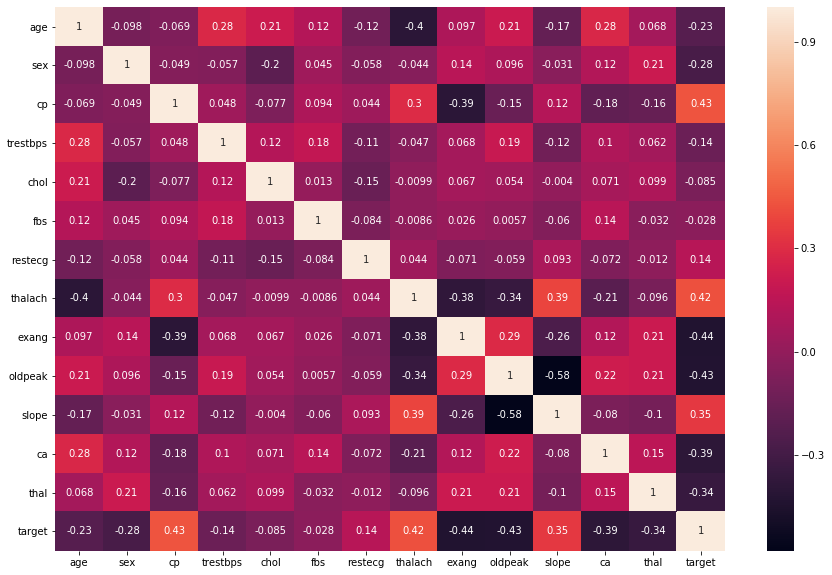

In [49]:
# taking the orginal dataframe

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot= True)

In [66]:
x = df.drop(['target'], axis =1)
y = df['target']

In [67]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 5)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.2, random_state = 10)

In [72]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_val.shape)

(193, 13)
(193,)
(61, 13)
(61,)
(49,)


In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [87]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score

In [105]:
acc_scores = []
roc_auc_scores= []
f_score = []
acc_scores_1 = []
for i in range (1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    predicted = knn.predict(x_val)
    print(f'neighbours value: {i}')
    print(accuracy_score(y_val,predicted))
    print(roc_auc_score(y_val,predicted))
    print(f1_score(y_val,predicted))
    acc_scores.append(accuracy_score(y_val,predicted))
    roc_auc_scores.append(roc_auc_score(y_val,predicted))
    f_score.append(f1_score(y_val,predicted))
    predicted1 = knn.predict(x_train)
    acc_scores_1.append(accuracy_score(y_train,predicted1))

neighbours value: 1
0.6530612244897959
0.6473063973063973
0.6909090909090909
neighbours value: 2
0.5918367346938775
0.6085858585858586
0.5454545454545455
neighbours value: 3
0.673469387755102
0.67003367003367
0.7037037037037037
neighbours value: 4
0.5918367346938775
0.6043771043771043
0.5652173913043478
neighbours value: 5
0.5714285714285714
0.5648148148148149
0.6181818181818182
neighbours value: 6
0.5510204081632653
0.5589225589225589
0.5416666666666666
neighbours value: 7
0.5510204081632653
0.5420875420875422
0.6071428571428571
neighbours value: 8
0.5714285714285714
0.5648148148148149
0.6181818181818182
neighbours value: 9
0.6122448979591837
0.5976430976430976
0.6779661016949152
neighbours value: 10
0.5714285714285714
0.5606060606060606
0.631578947368421
neighbours value: 11
0.6122448979591837
0.5976430976430976
0.6779661016949152
neighbours value: 12
0.6122448979591837
0.5976430976430976
0.6779661016949152
neighbours value: 13
0.5918367346938775
0.5749158249158248
0.6666666666666666

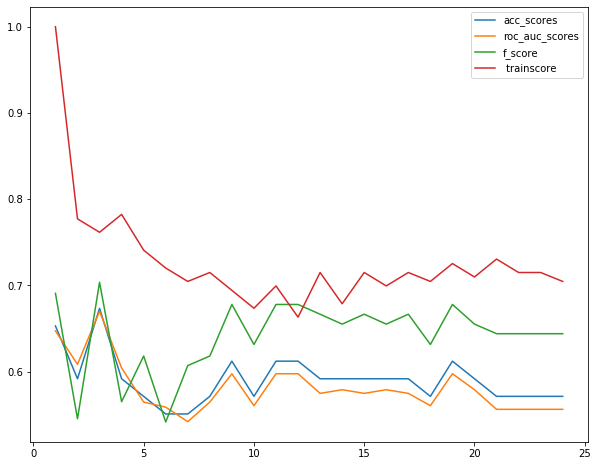

In [107]:
plt.figure(figsize=(10,8))
plt.plot(range(1,25),acc_scores)
plt.plot(range(1,25),roc_auc_scores)
plt.plot(range(1,25),f_score)
plt.plot(range(1,25),acc_scores_1)
plt.legend(['acc_scores', 'roc_auc_scores', 'f_score',' trainscore'])

In [109]:
from sklearn.metrics import recall_score, roc_auc_score,precision_score,classification_report

In [110]:
# testing the test data set
knn_best = KNeighborsClassifier(n_neighbors=3)
knn_best.fit(x_train,y_train)
test_predict = knn_best.predict(x_test)
print(accuracy_score(y_test,test_predict))
print(recall_score(y_test,test_predict))
print(roc_auc_score(y_test,test_predict))
print(precision_score(y_test,test_predict))
print('classification report\n',classification_report(y_test,test_predict))

0.6229508196721312
0.7741935483870968
0.6204301075268818
0.6
classification report
               precision    recall  f1-score   support

           0       0.67      0.47      0.55        30
           1       0.60      0.77      0.68        31

    accuracy                           0.62        61
   macro avg       0.63      0.62      0.61        61
weighted avg       0.63      0.62      0.61        61



In [112]:
# testing the test data set
knn_best = KNeighborsClassifier(n_neighbors=11)
knn_best.fit(x_train,y_train)
test_predict = knn_best.predict(x_test)
print(accuracy_score(y_test,test_predict))
print(recall_score(y_test,test_predict))
print(roc_auc_score(y_test,test_predict))
print(precision_score(y_test,test_predict))
print('classification report\n',classification_report(y_test,test_predict))

0.639344262295082
0.6451612903225806
0.6392473118279569
0.6451612903225806
classification report
               precision    recall  f1-score   support

           0       0.63      0.63      0.63        30
           1       0.65      0.65      0.65        31

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



In [115]:
knn_best = KNeighborsClassifier(n_neighbors=12)
knn_best.fit(x_train,y_train)
test_predict = knn_best.predict(x_test)
print(accuracy_score(y_test,test_predict))
print(recall_score(y_test,test_predict))
print(roc_auc_score(y_test,test_predict))
print(precision_score(y_test,test_predict))
print('classification report\n',classification_report(y_test,test_predict))

0.6721311475409836
0.6129032258064516
0.6731182795698925
0.7037037037037037
classification report
               precision    recall  f1-score   support

           0       0.65      0.73      0.69        30
           1       0.70      0.61      0.66        31

    accuracy                           0.67        61
   macro avg       0.68      0.67      0.67        61
weighted avg       0.68      0.67      0.67        61



# scaled dataframe model build

In [132]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1


In [158]:
#dataframe scaled
x1 = df1.drop(['Target'], axis =1)
y1 = df1['Target']

# partinng the data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x1,y1, test_size = 0.2, random_state = 5)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.2, random_state = 10)


In [159]:
acc_scores = []
roc_auc_scores= []
f_score = []
acc_scores_1 = []
for i in range (1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    predicted = knn.predict(x_val)
    print(f'neighbours value: {i}')
    print(accuracy_score(y_val,predicted))
    print(roc_auc_score(y_val,predicted))
    print(f1_score(y_val,predicted))
    acc_scores.append(accuracy_score(y_val,predicted))
    roc_auc_scores.append(roc_auc_score(y_val,predicted))
    f_score.append(f1_score(y_val,predicted))
    predicted1 = knn.predict(x_train)
    acc_scores_1.append(accuracy_score(y_train,predicted1))

neighbours value: 1
0.7142857142857143
0.7070707070707071
0.75
neighbours value: 2
0.7346938775510204
0.7424242424242422
0.7346938775510203
neighbours value: 3
0.7346938775510204
0.7297979797979798
0.7636363636363638
neighbours value: 4
0.7551020408163265
0.7609427609427609
0.76
neighbours value: 5
0.7346938775510204
0.7255892255892256
0.7719298245614035
neighbours value: 6
0.7142857142857143
0.7154882154882155
0.7307692307692308
neighbours value: 7
0.7346938775510204
0.7297979797979798
0.7636363636363638
neighbours value: 8
0.7755102040816326
0.7752525252525252
0.7924528301886792
neighbours value: 9
0.7142857142857143
0.7070707070707071
0.75
neighbours value: 10
0.7346938775510204
0.734006734006734
0.7547169811320754
neighbours value: 11
0.7551020408163265
0.7483164983164984
0.7857142857142857
neighbours value: 12
0.7551020408163265
0.7567340067340067
0.7692307692307692
neighbours value: 13
0.8163265306122449
0.8122895622895623
0.8363636363636364
neighbours value: 14
0.775510204081632

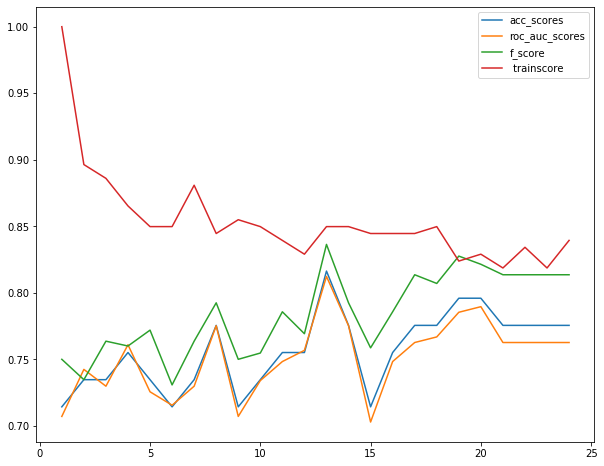

In [160]:
plt.figure(figsize=(10,8))
plt.plot(range(1,25),acc_scores)
plt.plot(range(1,25),roc_auc_scores)
plt.plot(range(1,25),f_score)
plt.plot(range(1,25),acc_scores_1)
plt.legend(['acc_scores', 'roc_auc_scores', 'f_score',' trainscore'])

In [163]:
knn_best = KNeighborsClassifier(n_neighbors=14)
knn_best.fit(x_train,y_train)
test_predict = knn_best.predict(x_test)
print(accuracy_score(y_test,test_predict))
print(recall_score(y_test,test_predict))
print(roc_auc_score(y_test,test_predict))
print(precision_score(y_test,test_predict))
print('classification report\n',classification_report(y_test,test_predict))

0.9016393442622951
0.9032258064516129
0.9016129032258066
0.9032258064516129
classification report
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.90      0.90      0.90        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [165]:
knn_best = KNeighborsClassifier(n_neighbors=15)
knn_best.fit(x_train,y_train)
test_predict = knn_best.predict(x_test)
print(accuracy_score(y_test,test_predict))
print(recall_score(y_test,test_predict))
print(roc_auc_score(y_test,test_predict))
print(precision_score(y_test,test_predict))
print('classification report\n',classification_report(y_test,test_predict))

0.8852459016393442
0.9032258064516129
0.8849462365591398
0.875
classification report
               precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



In [166]:
knn_best = KNeighborsClassifier(n_neighbors=19)
knn_best.fit(x_train,y_train)
test_predict = knn_best.predict(x_test)
print(accuracy_score(y_test,test_predict))
print(recall_score(y_test,test_predict))
print(roc_auc_score(y_test,test_predict))
print(precision_score(y_test,test_predict))
print('classification report\n',classification_report(y_test,test_predict))

0.9016393442622951
0.9354838709677419
0.9010752688172043
0.8787878787878788
classification report
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.88      0.94      0.91        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [168]:
knn_best = KNeighborsClassifier(n_neighbors=20)
knn_best.fit(x_train,y_train)
test_predict = knn_best.predict(x_test)
print(accuracy_score(y_test,test_predict))
print(recall_score(y_test,test_predict))
print(roc_auc_score(y_test,test_predict))
print(precision_score(y_test,test_predict))
print('classification report\n',classification_report(y_test,test_predict))

0.8852459016393442
0.9032258064516129
0.8849462365591398
0.875
classification report
               precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



In [169]:
# at the value of k-19 we are getting the best value

In [170]:
knn_best = KNeighborsClassifier(n_neighbors=19, weights = 'distance')
knn_best.fit(x_train,y_train)
test_predict = knn_best.predict(x_test)
print(accuracy_score(y_test,test_predict))
print(recall_score(y_test,test_predict))
print(roc_auc_score(y_test,test_predict))
print(precision_score(y_test,test_predict))
print('classification report\n',classification_report(y_test,test_predict))

0.9016393442622951
0.9354838709677419
0.9010752688172043
0.8787878787878788
classification report
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.88      0.94      0.91        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [173]:
#dataframe scaled
x1 = df1.drop(['Target','slope','cp','trestbps'], axis =1)
y1 = df1['Target']

# partinng the data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x1,y1, test_size = 0.2, random_state = 5)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.2, random_state = 10)

# predicting the scores
knn_best = KNeighborsClassifier(n_neighbors=19, weights = 'distance')
knn_best.fit(x_train,y_train)
test_predict = knn_best.predict(x_test)
print(accuracy_score(y_test,test_predict))
print(recall_score(y_test,test_predict))
print(roc_auc_score(y_test,test_predict))
print(precision_score(y_test,test_predict))
print('classification report\n',classification_report(y_test,test_predict))

0.7868852459016393
0.8064516129032258
0.7865591397849462
0.78125
classification report
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.78      0.81      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



# Tried the coorelated features. Tried the increase the model accuracy

# Trying the algorthims to get the best model

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [180]:
from sklearn.model_selection import GridSearchCV

In [186]:
#dataframe scaled
x1 = df1.drop(['Target','slope','cp','trestbps'], axis =1)
y1 = df1['Target']

# partinng the data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x1,y1, test_size = 0.2, random_state = 5)

classifier = {'Decision' : DecisionTreeClassifier(),'Random': RandomForestClassifier(n_estimators=150), 'Logisitic': LogisticRegression()}



In [188]:
for j,i in classifier.items():
    i.fit(x_train, y_train)
    test_predict = i.predict(x_test)
    print(j)
    print(accuracy_score(y_test,test_predict))
    print(recall_score(y_test,test_predict))
    print(roc_auc_score(y_test,test_predict))
    print(precision_score(y_test,test_predict))
    print('classification report\n',classification_report(y_test,test_predict))

Decision
0.6557377049180327
0.6129032258064516
0.6564516129032257
0.6785714285714286
classification report
               precision    recall  f1-score   support

           0       0.64      0.70      0.67        30
           1       0.68      0.61      0.64        31

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61

Random
0.8524590163934426
0.8387096774193549
0.8526881720430108
0.8666666666666667
classification report
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.87      0.84      0.85        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Logisitic
0.8688524590163934
0.8387096774193549
0.8693548387096776
0.896551724137931
classification report
               precision 

In [187]:
    RandomForestClassifier(n_estimators=200).fit(x_train, y_train)
    test_predict = knn_best.predict(x_test)
    print(accuracy_score(y_test,test_predict))
    print(recall_score(y_test,test_predict))
    print(roc_auc_score(y_test,test_predict))
    print(precision_score(y_test,test_predict))
    print('classification report\n',classification_report(y_test,test_predict))

0.7868852459016393
0.8064516129032258
0.7865591397849462
0.78125
classification report
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.78      0.81      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [ ]:
LogisticRegression()